In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as img 
import matplotlib.patches as patches

%config InlineBackend.figure_format = 'retina'

In [2]:
df_fifa = pd.read_csv('fifa2019.csv')
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df_fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
df_height = df_fifa.groupby('Height').count()['Name'] # Groups by height and doesn't count missing values!
x, y = df_height.sum(), df_height.loc[["5'9","5'10","5'11","6'0","6'1","6'2"]].sum()
percentage = y/x*100
percentage

75.33454485379151

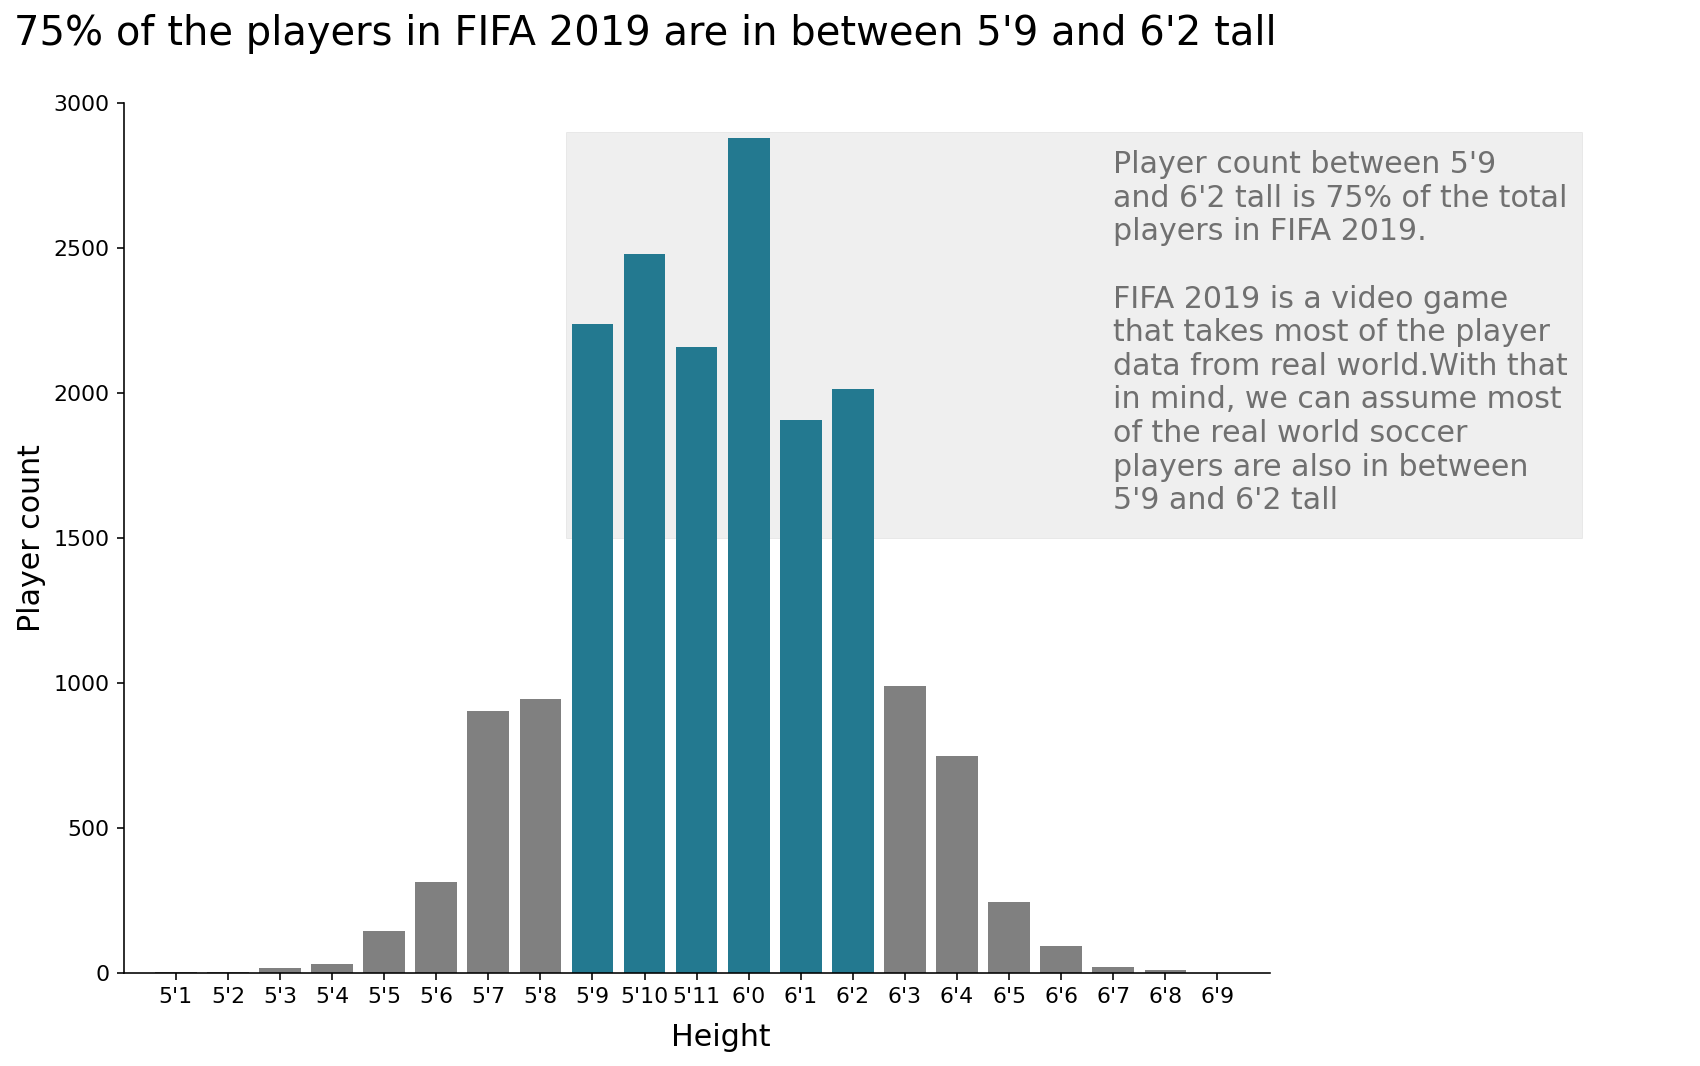

In [15]:
fig, ax = plt.subplots(figsize=(14,8))

ax.set_ylim(0,3000)
ax.set_xlim(-1,29)

heights=["5'1","5'2","5'3","5'4","5'5","5'6","5'7","5'8","5'9","5'10","5'11",
         "6'0","6'1","6'2","6'3","6'4","6'5","6'6","6'7","6'8","6'9"]

rect = patches.Rectangle(xy=(7.5,1500), width=19.5, height=1400,
                         facecolor='gray', linewidth=.5, edgecolor="gray", alpha = 0.12)
ax.add_patch(rect)

for i, height in enumerate(heights):
    color = ('#237990' if (height=="5'9")|(height=="5'10")|(height=="5'11")|(height=="6'0")|(height=="6'1")|(height=="6'2") else 'gray')
    ax.bar(i,df_height.loc[height], color = color)
    
ax.text(-3.1,3200,"75% of the players in FIFA 2019 are in between 5'9 and 6'2 tall", fontsize = 20)
ax.text(18,1600,"Player count between 5'9\nand 6'2 tall is 75% of the total\nplayers in FIFA 2019.\n\nFIFA 2019 is a video game\nthat takes most of the player\ndata from real world.With that\nin mind, we can assume most\nof the real world soccer\nplayers are also in between\n5'9 and 6'2 tall",fontsize=15,color='#707070')
ax.text(9.5,-250,'Height', fontsize=15)
ax.set_ylabel('Player count', fontsize=15)

ax.set_xticks(range(21))
ax.set_xticklabels(heights,fontsize=11)
plt.yticks(fontsize= 11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(-1, 21)

plt.show()

- Reordered categories from low to high since height is a quantitative(ratio) data
- Renamed axis labels to be more concise and understandable
- Changed colors to the same color to be consistent and less distracting
- Changed title to summarize what's found about the data
- Enclosed the 5'9, 6'2 height area(gestalt principle) and changed color to create contrast, since findings and the story we are telling is about that range
- Added text to point out what's possible about real world